In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tau = pd.read_csv('train_final.csv')
tau

,Order_No,User_Id,Vehicle_Type,Platform_Type,Customer_Type,Placement_Day,Placement_Weekday,Placement_Time,Confirmation_Day,Confirmation_Weekday,...,conf-pick,place_confi,conf_pic,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Temperature Category,Placement_Hour,Distance_Category
0,Order_No_24677,User_Id_3326,Bike,3,Business,23,Wednesday,15:55:44,23,Wednesday,...,0:01:06,12,66,1402,1443,13.6,258,Moderate,15,Medium
1,Order_No_3873,User_Id_3689,Bike,3,Business,5,Tuesday,13:48:07,5,Tuesday,...,0:01:12,21,72,1601,1337,13.7,441,Moderate,13,Short
2,Order_No_21936,User_Id_3604,Bike,3,Personal,20,Wednesday,17:18:32,20,Wednesday,...,0:01:17,59,77,6421,2043,14.2,2026,Moderate,17,Long
3,Order_No_13648,User_Id_1051,Bike,3,Business,25,Friday,16:54:16,25,Friday,...,0:01:20,6,80,6695,2109,14.2,1874,Moderate,16,Short
4,Order_No_19327,User_Id_1329,Bike,3,Business,29,Thursday,18:32:44,29,Thursday,...,0:01:21,4,81,3036,1426,14.2,955,Moderate,18,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17344,Order_No_16870,User_Id_1281,Bike,3,Business,1,Wednesday,12:21:21,1,Wednesday,...,1:55:39,53,6939,284,758,14.6,82,Moderate,12,Medium
17345,Order_No_23005,User_Id_635,Bike,3,Business,13,Thursday,08:56:54,13,Thursday,...,2:00:42,228,7242,389,297,13.6,30,Moderate,8,Medium
17346,Order_No_16974,User_Id_1961,Bike,3,Business,7,Friday,13:45:42,7,Friday,...,2:12:11,1699,7931,389,297,13.6,30,Moderate,13,Long
17347,Order_No_9125,User_Id_1271,Bike,3,Business,14,Tuesday,13:09:12,14,Tuesday,...,2:16:16,944,8176,101,841,12.3,28,Moderate,13,Long


In [3]:
tau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17349 entries, 0 to 17348
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_No              17349 non-null  object 
 1   User_Id               17349 non-null  object 
 2   Vehicle_Type          17349 non-null  object 
 3   Platform_Type         17349 non-null  int64  
 4   Customer_Type         17349 non-null  object 
 5   Placement_Day         17349 non-null  int64  
 6   Placement_Weekday     17349 non-null  object 
 7   Placement_Time        17349 non-null  object 
 8   Confirmation_Day      17349 non-null  int64  
 9   Confirmation_Weekday  17349 non-null  object 
 10  Confirmation_Time     17349 non-null  object 
 11  Arrival_Day           17349 non-null  int64  
 12  Arrival _Weekday      17349 non-null  object 
 13  Arrival_Time          17349 non-null  object 
 14  Pickup_Day            17349 non-null  int64  
 15  Pickup_Weekday     

In [4]:
mapping = { 'Moderate':0 , 'Cold': 1, 'Hot':2 }
tau['Temperature Category'] = tau['Temperature Category'].replace(mapping)

mapping = { 'Monday':0 , 'Tuesday': 1, 'Wednesday':2 ,'Thursday':3, 'Friday':4 , 'Saturday':5, 'Sunday':6 }
tau['Confirmation_Weekday'] = tau['Confirmation_Weekday'].replace(mapping)

mapping = { 'Monday':0 , 'Tuesday': 1, 'Wednesday':2 ,'Thursday':3, 'Friday':4 , 'Saturday':5, 'Sunday':6 }
tau['Placement_Weekday'] = tau['Placement_Weekday'].replace(mapping)

mapping = { 'Personal':0 , 'Business': 1}
tau['Customer_Type'] = tau['Customer_Type'].replace(mapping)

mapping = { 'Monday':0 , 'Tuesday': 1, 'Wednesday':2 ,'Thursday':3, 'Friday':4 , 'Saturday':5, 'Sunday':6 }
tau['Placement_Day'] = tau['Placement_Day'].replace(mapping)

mapping = { 'Monday':0 , 'Tuesday': 1, 'Wednesday':2 ,'Thursday':3, 'Friday':4 , 'Saturday':5, 'Sunday':6 }
tau['Destination_Weekday'] = tau['Destination_Weekday'].replace(mapping)



In [5]:
tau.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type', 'Customer_Type',
       'Placement_Day', 'Placement_Weekday', 'Placement_Time',
       'Confirmation_Day', 'Confirmation_Weekday', 'Confirmation_Time',
       'Arrival_Day', 'Arrival _Weekday', 'Arrival_Time', 'Pickup_Day',
       'Pickup_Weekday', 'Pickup_Time', 'Destination_Day',
       'Destination_Weekday', 'Destination_Time', 'Distance', 'Temperature',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'Pickup-Arrival_Time', 'place-confi', 'conf-pick',
       'place_confi', 'conf_pic', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Temperature Category', 'Placement_Hour',
       'Distance_Category'],
      dtype='object')

In [6]:
tau.head(5)

,Order_No,User_Id,Vehicle_Type,Platform_Type,Customer_Type,Placement_Day,Placement_Weekday,Placement_Time,Confirmation_Day,Confirmation_Weekday,...,conf-pick,place_confi,conf_pic,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Temperature Category,Placement_Hour,Distance_Category
0,Order_No_24677,User_Id_3326,Bike,3,1,23,2,15:55:44,23,2,...,0:01:06,12,66,1402,1443,13.6,258,0,15,Medium
1,Order_No_3873,User_Id_3689,Bike,3,1,5,1,13:48:07,5,1,...,0:01:12,21,72,1601,1337,13.7,441,0,13,Short
2,Order_No_21936,User_Id_3604,Bike,3,0,20,2,17:18:32,20,2,...,0:01:17,59,77,6421,2043,14.2,2026,0,17,Long
3,Order_No_13648,User_Id_1051,Bike,3,1,25,4,16:54:16,25,4,...,0:01:20,6,80,6695,2109,14.2,1874,0,16,Short
4,Order_No_19327,User_Id_1329,Bike,3,1,29,3,18:32:44,29,3,...,0:01:21,4,81,3036,1426,14.2,955,0,18,Short


In [7]:
from datetime import datetime

# Assuming tau['Confirmation_Time'] is a Series containing the time entries
time_entries = tau['Confirmation_Time']

# Convert each time entry to datetime object and store in a list
time_objects = [datetime.strptime(time_entry, '%I:%M:%S %p') for time_entry in time_entries]

# Extract hours, minutes, and seconds for each time object
hours = [time_object.hour for time_object in time_objects]
minutes = [time_object.minute for time_object in time_objects]
seconds = [time_object.second for time_object in time_objects]

# Convert each time to a single numerical value representing seconds since midnight
times_in_seconds = [(hour * 3600 + minute * 60 + second) for hour, minute, second in zip(hours, minutes, seconds)]

# Print the resulting list of times in seconds
print("Times in seconds:", times_in_seconds)


Times in seconds: [57356, 49708, 62371, 60862, 66768, 51872, 57126, 59761, 37598, 58643, 62020, 51435, 56584, 47360, 35132, 59357, 36598, 51877, 41828, 45741, 65797, 39693, 60349, 36797, 59205, 47173, 56359, 59521, 55414, 54720, 48082, 37307, 59202, 42211, 52360, 44131, 61765, 35826, 57322, 47685, 40686, 54215, 33440, 49520, 61208, 57485, 42031, 55776, 29889, 51546, 62818, 31503, 57960, 48530, 41207, 36630, 41121, 56055, 40733, 47917, 52544, 37096, 38166, 37704, 60771, 50547, 57748, 46018, 53987, 46833, 38654, 37612, 57527, 39105, 60256, 55512, 46253, 54854, 61241, 53729, 44571, 49471, 57410, 56907, 58644, 45710, 44628, 33451, 52873, 37528, 53821, 58997, 50695, 37330, 33609, 42638, 48055, 52848, 56870, 54669, 46224, 54046, 58790, 53278, 37110, 54475, 55899, 50808, 37955, 43003, 57263, 55274, 48131, 48603, 56687, 43523, 36518, 49323, 50507, 44246, 56059, 39442, 40794, 53572, 46061, 62572, 39570, 60786, 49129, 47627, 39270, 56470, 33815, 38180, 55877, 53415, 51930, 54266, 50209, 52277, 6

In [8]:
times_in_seconds

[57356,
 49708,
 62371,
 60862,
 66768,
 51872,
 57126,
 59761,
 37598,
 58643,
 62020,
 51435,
 56584,
 47360,
 35132,
 59357,
 36598,
 51877,
 41828,
 45741,
 65797,
 39693,
 60349,
 36797,
 59205,
 47173,
 56359,
 59521,
 55414,
 54720,
 48082,
 37307,
 59202,
 42211,
 52360,
 44131,
 61765,
 35826,
 57322,
 47685,
 40686,
 54215,
 33440,
 49520,
 61208,
 57485,
 42031,
 55776,
 29889,
 51546,
 62818,
 31503,
 57960,
 48530,
 41207,
 36630,
 41121,
 56055,
 40733,
 47917,
 52544,
 37096,
 38166,
 37704,
 60771,
 50547,
 57748,
 46018,
 53987,
 46833,
 38654,
 37612,
 57527,
 39105,
 60256,
 55512,
 46253,
 54854,
 61241,
 53729,
 44571,
 49471,
 57410,
 56907,
 58644,
 45710,
 44628,
 33451,
 52873,
 37528,
 53821,
 58997,
 50695,
 37330,
 33609,
 42638,
 48055,
 52848,
 56870,
 54669,
 46224,
 54046,
 58790,
 53278,
 37110,
 54475,
 55899,
 50808,
 37955,
 43003,
 57263,
 55274,
 48131,
 48603,
 56687,
 43523,
 36518,
 49323,
 50507,
 44246,
 56059,
 39442,
 40794,
 53572,
 46061,


In [9]:
tau.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type', 'Customer_Type',
       'Placement_Day', 'Placement_Weekday', 'Placement_Time',
       'Confirmation_Day', 'Confirmation_Weekday', 'Confirmation_Time',
       'Arrival_Day', 'Arrival _Weekday', 'Arrival_Time', 'Pickup_Day',
       'Pickup_Weekday', 'Pickup_Time', 'Destination_Day',
       'Destination_Weekday', 'Destination_Time', 'Distance', 'Temperature',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'Pickup-Arrival_Time', 'place-confi', 'conf-pick',
       'place_confi', 'conf_pic', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Temperature Category', 'Placement_Hour',
       'Distance_Category'],
      dtype='object')

<Axes: >

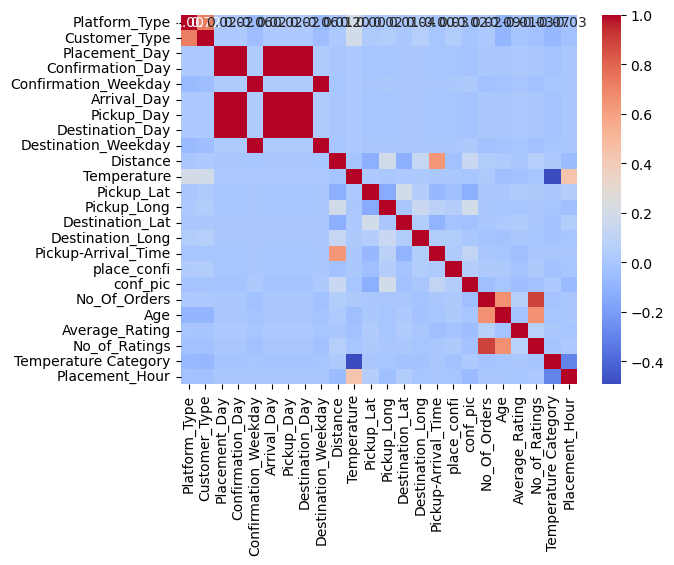

In [10]:

# Select only numeric columns
numeric_columns = tau.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

In [11]:
tau.columns

Index(['Order_No', 'User_Id', 'Vehicle_Type', 'Platform_Type', 'Customer_Type',
       'Placement_Day', 'Placement_Weekday', 'Placement_Time',
       'Confirmation_Day', 'Confirmation_Weekday', 'Confirmation_Time',
       'Arrival_Day', 'Arrival _Weekday', 'Arrival_Time', 'Pickup_Day',
       'Pickup_Weekday', 'Pickup_Time', 'Destination_Day',
       'Destination_Weekday', 'Destination_Time', 'Distance', 'Temperature',
       'Pickup_Lat', 'Pickup_Long', 'Destination_Lat', 'Destination_Long',
       'Rider_Id', 'Pickup-Arrival_Time', 'place-confi', 'conf-pick',
       'place_confi', 'conf_pic', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'Temperature Category', 'Placement_Hour',
       'Distance_Category'],
      dtype='object')

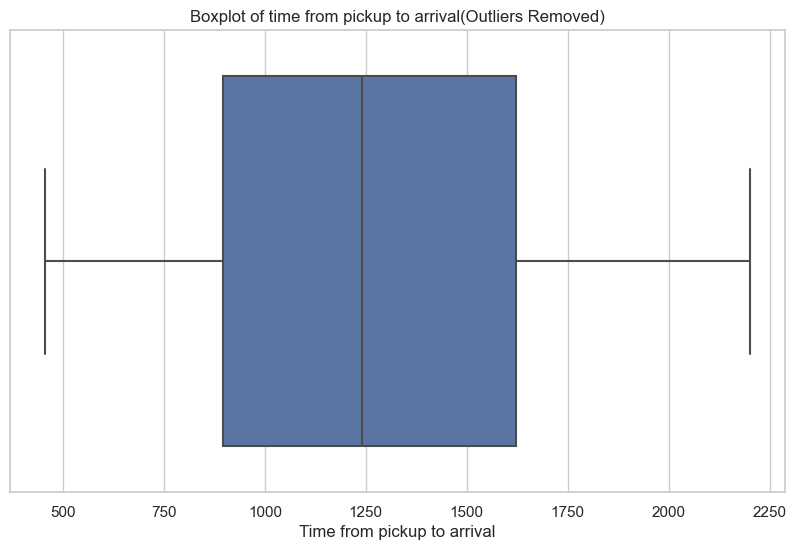

In [12]:
import seaborn as sns
import pandas as pd

# Assuming 'tau' is your DataFrame and 'Pickup-Arrival_Time' is a column in it

# Calculate quartiles
Q1 = tau['Pickup-Arrival_Time'].quantile(0.25)
Q3 = tau['Pickup-Arrival_Time'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

# Filter the data to remove outliers
tau_filtered = tau[(tau['Pickup-Arrival_Time'] >= lower_bound) & (tau['Pickup-Arrival_Time'] <= upper_bound)]

# Set the style of the plot for better aesthetics
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=tau_filtered['Pickup-Arrival_Time'])

# Set the title and labels
plt.title('Boxplot of time from pickup to arrival(Outliers Removed)')
plt.xlabel('Time from pickup to arrival')

# Show the plot
plt.show()

In [13]:
# ,'Temperature','No_Of_Orders','Placement_Day','Destination_Weekday','Age'

In [14]:
# Assuming `times_in_seconds` is a list containing the converted time entries in seconds
x = pd.DataFrame(times_in_seconds, columns=['times_in_seconds'])
y = tau[['Pickup-Arrival_Time']]

# Print the first few rows of x and y to verify they are constructed correctly
print("x:", x.head())
print("y:", y.head())

x:    times_in_seconds
0             57356
1             49708
2             62371
3             60862
4             66768
y:    Pickup-Arrival_Time
0                 1173
1                 1045
2                 2125
3                  743
4                  540


In [15]:
# x = time_entries[['times_in_seconds']]
# y = tau[['Pickup-Arrival_Time']]


In [16]:
import matplotlib.pyplot as plt

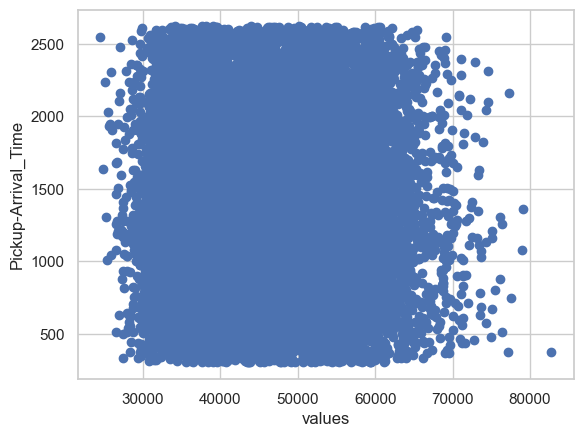

In [17]:

plt.scatter(x,y)
plt.xlabel("values")
plt.ylabel("Pickup-Arrival_Time")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state= 23)

In [19]:
X_train


,times_in_seconds
679,37154
16321,59148
3857,44464
5535,47645
15296,45880
...,...
6175,70421
9704,38270
11190,43017
9256,52207


In [20]:
X_train = np.array(X_train).reshape(-1,1)
X_train

array([[37154],
       [59148],
       [44464],
       ...,
       [43017],
       [52207],
       [58018]])

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
lr = DecisionTreeRegressor()

In [23]:
lr.fit(X_train, y_train)

DecisionTreeRegressor()

In [24]:
# plt.scatter(X_train,y_train)
# plt.scatter(X_train,y_pred_train1, color = 'black')
# plt.xlabel("number of orders")
# plt.ylabel("pickup")

In [25]:
prediction=lr.predict(X_test)
prediction

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


array([1268. ,  923. , 1955. , ..., 1638. , 1353.5,  901. ])

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,prediction)
r2

-0.8996935648696192

In [27]:
from sklearn.metrics import mean_squared_error
import math
error=mean_squared_error(y_test,prediction)
rmse = math.sqrt(error)
error
rmse



ValueError: Found input variables with inconsistent numbers of samples: [12144, 5205]

###Random Forest Model

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
random_forest_model = RandomForestRegressor()

In [30]:
random_forest_model.fit(X_train, y_train)

/var/folders/gn/clhq9k9140jfd9jjcjjjpqvh0000gn/T/ipykernel_4189/3109229370.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestRegressor()

In [31]:
prediction=lr.predict(X_train)
prediction

array([1175. ,  713. , 1202.5, ..., 1495. , 1071. , 1730. ])

In [32]:
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test,prediction)
# r2

ValueError: Found input variables with inconsistent numbers of samples: [5205, 12144]